<a href="https://colab.research.google.com/github/sieuthanthu002/bt-AI-2/blob/main/money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img,img_to_array

folder = '/content/drive/MyDrive/Money/'
photos,labels = list(),list()
for file in listdir(folder):
  if file.startswith('5k'):
    output = 0
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('10k'):
    output = 1
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('20k'):
    output = 2
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('50k'):
    output = 3
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('100k'):
    output = 4
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('200k'):
    output = 5
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
for file in listdir(folder):
  if file.startswith('500k'):
    output = 6
    photo = load_img(folder+file,target_size=(40,30))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos=asarray(photos)
labels=asarray(labels)
print(photos.shape,labels.shape)
save('face.npy',photos)
save('face.npy',labels)


(200, 40, 30, 3) (200,)


In [3]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(40,30,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
7/7 [==============================] - 12s 45ms/step - loss: 39.3274 - accuracy: 0.1500
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 4.1579 - accuracy: 0.3450
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 1.6799 - accuracy: 0.3500
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 1.2600 - accuracy: 0.5500
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 0.9028 - accuracy: 0.6500
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6798 - accuracy: 0.7650
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 0.5555 - accuracy: 0.7950
Epoch 8/50
7/7 [==============================] - 0s 7ms/step - loss: 0.3791 - accuracy: 0.8750
Epoch 9/50
7/7 [==============================] - 0s 7ms/step - loss: 0.2557 - accuracy: 0.9350
Epoch 10/50
7/7 [==============================] - 0s 8ms/step - loss: 0.1999 - accuracy: 0.9650
Epoch 11/50
7/7 [===================

In [4]:
model.evaluate(photos,labels)
model.save('Nhandangkhuonmat.h5')
classes = ["5k","10k","20k","50k","100k","200k","500k",]

7/7 [==============================] - 0s 4ms/step - loss: 6.0304e-04 - accuracy: 1.0000


1/1 [==============================] - 0s 28ms/step


'200k'

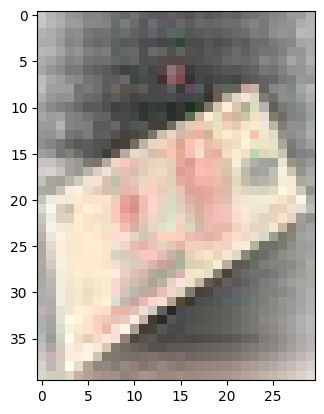

In [9]:
import numpy as np
import matplotlib.pyplot as plt

img = load_img('/content/drive/MyDrive/test folder/200k 20.jpg', 
               target_size=(40,30))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,40,30,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]